In [1]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

import ERA_Fields_New as ef

import xarray as xr

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
In this environment you cannot import Basemap


In [14]:
reload(ef)

In this environment you cannot import Basemap


<module 'ERA_Fields_New' from '/Users/alessandrolovo/Repos/Climate-Learning/ERA/ERA_Fields_New.py'>

In [24]:
tas = ef.Plasim_Field('tas', 'tas_ds.nc', '2m T', Model='Plasim', mylocal='../../EW2-heatwaves/data/')

The loaded field has 500 years, not 1000 as provided. Setting self.years = 500


In [25]:
tas.set_mask('France')

In [22]:
tas.select_lonlat(lon_start=64, lon_end=64)

In [48]:
ma1 = ef.masked_average(tas.field, dim=['lon', 'lat'], weights=tas.land_area_weights, mask=tas.mask)

In [49]:
ma1

<xarray.DataArray (time: 60000)>
array([ 1.293383 ,  1.7858801, -0.5183729, ..., -0.6539605,  1.9945414,
        3.4429486], dtype=float32)
Coordinates:
  * time     (time) object 0000-05-01 10:30:00 ... 0499-08-30 10:30:00

In [35]:
_w = xr.where(tas.mask, tas.land_area_weights, 0)

In [13]:
_w

<xarray.DataArray 'lsm' (lat: 22, lon: 128)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 87.86 85.1 82.31 79.53 ... 37.67 34.88 32.09 29.3

In [42]:
_xa = tas.field.where(tas.mask)

In [43]:
_xa

<xarray.DataArray 'tas' (time: 60000, lat: 22, lon: 128)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) object 0000-05-01 10:30:00 ... 0499-08-30 10:30:00
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 87.86 85.1 82.31 79.53 ... 37.67 34.88 32.09 29.3
Attributes:
    standard_name:  air_temperature_2m
    long_name:      air_temperature_2m
    units:          K
    code:           167

In [56]:
def masked_average(xa:xr.DataArray, dim=None, weights:xr.DataArray=None, mask:xr.DataArray=None):
    if weights is not None:
        _weights = weights.copy()
        if mask is not None:
            _weights = _weights.where(mask, 0)
    elif mask is not None:
        _weights = xr.where(mask, 1, 0)
    else:
        return xa.mean(dim=dim)

    _weights /= _weights.sum(dim=dim)

    _xa = xa*_weights
    return _xa.sum(dim=dim)

In [57]:
ma2 = masked_average(tas.field, dim=['lon', 'lat'], weights=tas.land_area_weights, mask=tas.mask)

In [58]:
ma2

<xarray.DataArray (time: 60000)>
array([ 1.2933829,  1.78588  , -0.5183729, ..., -0.6539605,  1.9945415,
        3.4429483], dtype=float32)
Coordinates:
  * time     (time) object 0000-05-01 10:30:00 ... 0499-08-30 10:30:00

In [53]:
%matplotlib widget

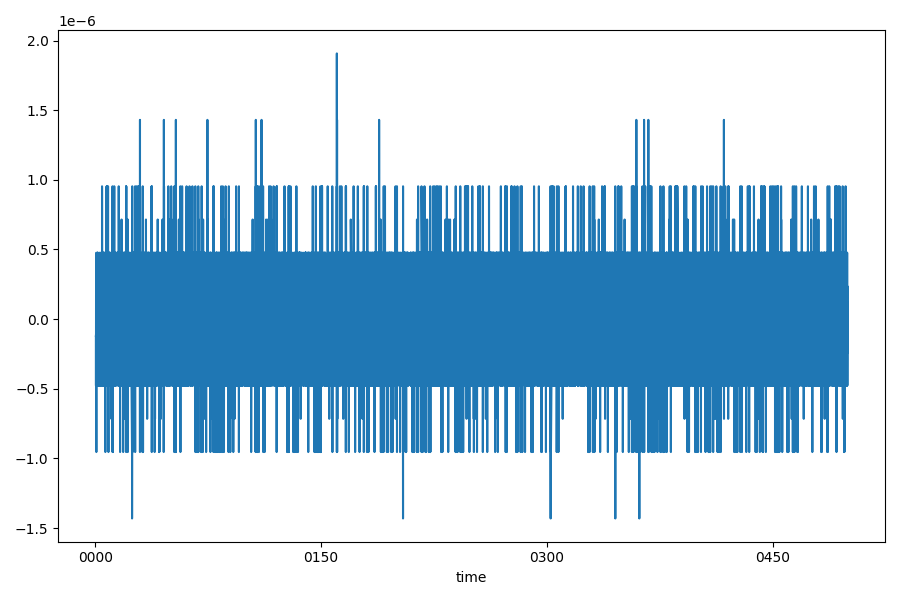

In [59]:
plt.close(1)
fig, ax = plt.subplots(num=1, figsize=(9,6))

(ma2 - ma1).plot()

fig.tight_layout()